Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank.

2) Once model is built, print classification report and analyze precision, recall and f1-score

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Drop rows that are not required

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Visualization

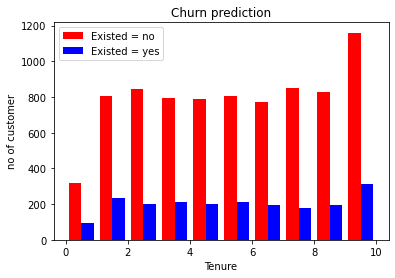

In [7]:
existed_yes = df[df['Exited']== 1].Tenure 
existed_no = df[df['Exited']== 0].Tenure 
plt.xlabel('Tenure')
plt.ylabel('no of customer')
plt.title('Churn prediction')
plt.hist([existed_no,existed_yes], color = ['red', 'blue'], label =(['Existed = no','Existed = yes']))
plt.legend()

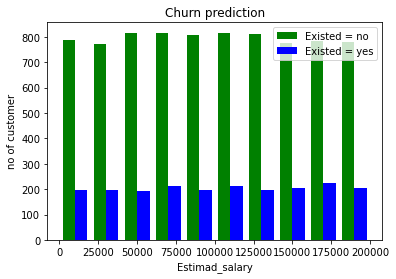

In [8]:
salary_no_existed = df[df.Exited== 0].EstimatedSalary
salary_yes_existed = df[df.Exited== 1].EstimatedSalary
plt.xlabel('Estimad_salary')
plt.ylabel('no of customer')
plt.title('Churn prediction')
plt.hist([salary_no_existed,salary_yes_existed], color = ['green', 'blue'], label =(['Existed = no','Existed = yes']))
plt.legend()

Converting categorical to numerical

In [9]:
df.Gender = df.Gender.map({'Female':1, 'Male':0}) 
df = pd.get_dummies(data=df, columns=['Geography'])

In [10]:
scaler = MinMaxScaler()
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Model Training

In [12]:
x = df.drop('Exited', axis = 1) 
y = df.Exited
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [14]:
x_train.shape

(7500, 12)

In [15]:
x_test.shape

(2500, 12)

In [16]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
        keras.layers.Dense(12, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')]) 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
235/235 [==============================] - 1s 888us/step - loss: 0.5179 - accuracy: 0.7979
Epoch 2/100
235/235 [==============================] - 0s 841us/step - loss: 0.4694 - accuracy: 0.7980
Epoch 3/100
235/235 [==============================] - 0s 845us/step - loss: 0.4565 - accuracy: 0.7980
Epoch 4/100
235/235 [==============================] - 0s 998us/step - loss: 0.4459 - accuracy: 0.8001
Epoch 5/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.8121
Epoch 6/100
235/235 [==============================] - 0s 876us/step - loss: 0.4280 - accuracy: 0.8149
Epoch 7/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.8177
Epoch 8/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8208
Epoch 9/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8205
Epoch 10/100
235/235 [==============================] - 0s 1ms/step - loss: 0.411

In [17]:
model.evaluate(x_test, y_test)

79/79 [==============================] - 0s 895us/step - loss: 0.3396 - accuracy: 0.8588


[0.33958742022514343, 0.8587999939918518]

In [18]:
yp = model.predict(x_test)
yp[:5]

array([[0.11639154],
       [0.0309715 ],
       [0.15441349],
       [0.11608317],
       [0.08144012]], dtype=float32)

In [19]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [20]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1978
           1       0.76      0.48      0.58       522

    accuracy                           0.86      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



Text(69.0, 0.5, 'Truth')

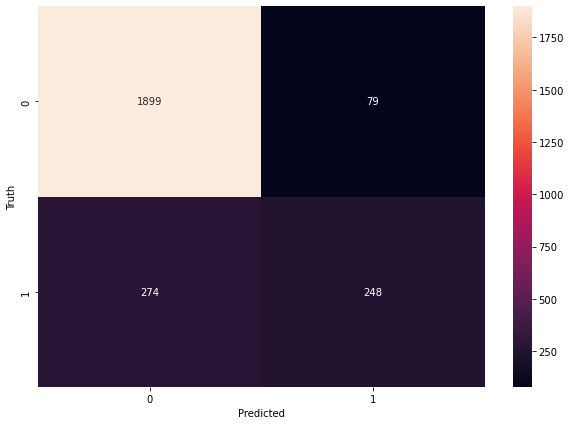

In [21]:
import seaborn as sn
from matplotlib  import pyplot as plt

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy

In [22]:
round((1922+229)/(1922+229+275+74),2)

0.86

Precision for 0 class. i.e. Precision for customers who did not

In [23]:
round(1922/(1922+275),2)

0.87

Precision for 1 class. i.e. Precision for customers who actually churned

In [24]:
round(229/(229+74),2)

0.76

Recall for 0 class

In [25]:
round(1922/(1922+74),2)

0.96

In [26]:
round(229/(229+275),2)

0.45